<a href="https://colab.research.google.com/github/diwashsapkota/DATA-SCIENCE-FROM-SCRATCH/blob/main/linear_regression_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/data.csv')
df.head()

,X,y
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925


## Batch Gradient Descent

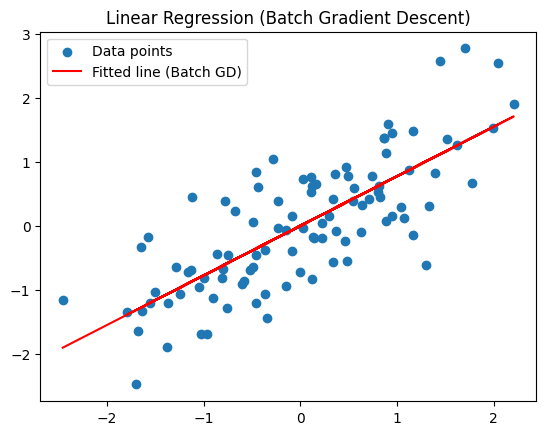

Batch GD time: 0.0155 seconds
RMSE: 0.6335


In [ ]:
X = df["X"].values
y = df["y"].values

X_normalized = (X - np.mean(X)) / np.std(X)
y_normalized = (y - np.mean(y)) / np.std(y)

# parameters initialization
w = np.zeros(2)  # [w_0, w_1]
alpha = 0.001  # Learning rate
epochs = 1000

# Batch gradient descent
start_time = time.time()
for epoch in range(epochs):
    y_predb = w[0] + w[1] * X_normalized
    gradient_0 = np.sum(y_normalized - y_predb)
    gradient_1 = np.sum((y_normalized - y_predb) * X)
    w[0] += alpha * gradient_0 / len(X)
    w[1] += alpha * gradient_1 / len(X)
end_time = time.time()

# Plot the data points
plt.scatter(X_normalized, y_normalized, label="Data points")

# Plot the fitted line
plt.plot(X_normalized, y_predb, color='red', label="Fitted line (Batch GD)")

plt.title("Linear Regression (Batch Gradient Descent)")
plt.legend()
plt.show()

batchexectime = end_time - start_time
print(f"Batch GD time: {batchexectime:.4f} seconds")

# Calculate RMSE
batch_rmse = np.sqrt(np.mean((y_predb - y_normalized) ** 2))
print(f"RMSE: {batch_rmse:.4f}")

## Stochastic Gradient Descent

Stochastic GD time: 0.2400 seconds
RMSE: 0.6335


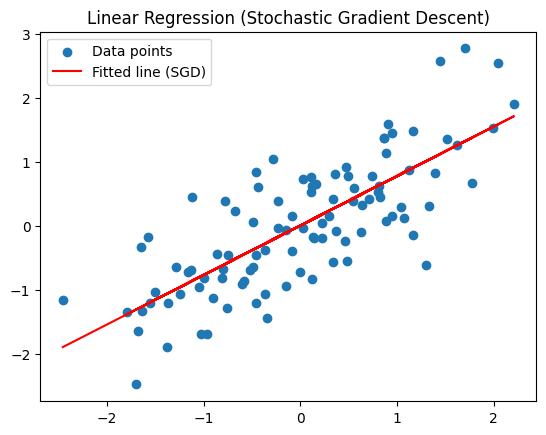

In [ ]:
X = df["X"].values
y = df["y"].values

X_normalized = (X - np.mean(X)) / np.std(X)
y_normalized = (y - np.mean(y)) / np.std(y)

# Stochastic gradient descent
w = np.zeros(2)
# Stochastic gradient descent
start_time = time.time()
for epoch in range(epochs):
    for i in range(len(X_normalized)):
        h = w[0] + w[1] * X_normalized[i]
        gradient_0 = h - y_normalized[i]
        gradient_1 = (h - y_normalized[i]) * X_normalized[i]
        w[0] -= alpha * gradient_0
        w[1] -= alpha * gradient_1
end_time = time.time()

y_predsgd = w[0] + w[1] * X_normalized

sgd_exectime = end_time - start_time
print(f"Stochastic GD time: {sgd_exectime:.4f} seconds")

# Calculate RMSE
sgd_rmse = np.sqrt(np.mean((y_predsgd - y_normalized) ** 2))
print(f"RMSE: {sgd_rmse:.4f}")

# Plot the data points
plt.scatter(X_normalized, y_normalized, label="Data points")

# Plot the fitted line
plt.plot(X_normalized, y_predsgd, color='red', label="Fitted line (SGD)")

plt.title("Linear Regression (Stochastic Gradient Descent)")
plt.legend()
plt.show()

## Mini-batch Gradient Descent

Mini-batch GD time: 0.2455 seconds
RMSE: 0.6335


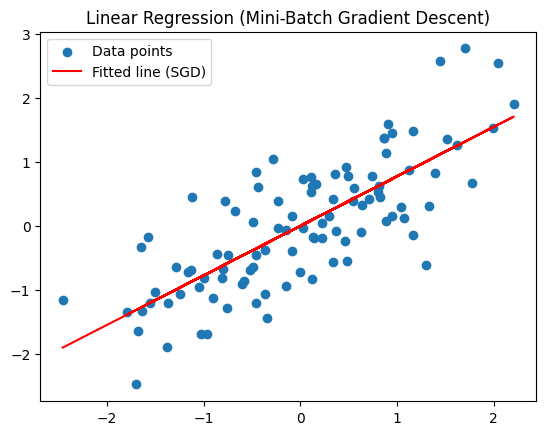

In [ ]:
X = df["X"].values
y = df["y"].values

X_normalized = (X - np.mean(X)) / np.std(X)
y_normalized = (y - np.mean(y)) / np.std(y)

# parameters initialization
w = np.zeros(2)  # [w_0, w_1]
alpha = 0.01  # Learning rate
epochs = 1000

# Mini-batch gradient descent
batch_size = 8
start_time = time.time()
for epoch in range(epochs):
    indices = np.random.permutation(len(X))
    for i in range(0, len(X_normalized), batch_size):
        X_batch, y_batch = X_normalized[indices[i:i + batch_size]], y_normalized[indices[i:i + batch_size]]
        h = w[0] + w[1] * X_batch
        gradient_0 = np.sum(h - y_batch)
        gradient_1 = np.sum((h - y_batch) * X_batch)
        w[0] -= alpha * gradient_0 / batch_size
        w[1] -= alpha * gradient_1 / batch_size

end_time = time.time()

# Compute predictions
y_predmb = w[0] + w[1] * X_normalized

mb_exectime = end_time - start_time
print(f"Mini-batch GD time: {mb_exectime:.4f} seconds")

# Calculate RMSE
mb_rmse = np.sqrt(np.mean((y_predmb - y_normalized) ** 2))
print(f"RMSE: {mb_rmse:.4f}")

# Plot the data points
plt.scatter(X_normalized, y_normalized, label="Data points")

# Plot the fitted line
plt.plot(X_normalized, y_predmb, color='red', label="Fitted line (SGD)")


plt.title("Linear Regression (Mini-Batch Gradient Descent)")
plt.legend()
plt.show()

## Comparing the Performance of 3 different approaches above

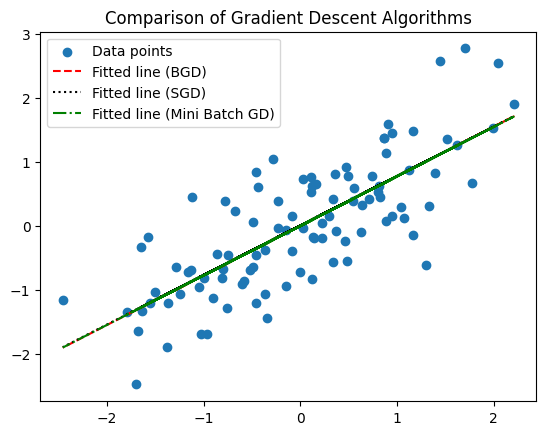

In [ ]:
# Plot the data points
plt.scatter(X_normalized, y_normalized, label="Data points")
# Plot the fitted line
plt.plot(X_normalized, y_predb, color='red', linestyle='--', label="Fitted line (BGD)")
plt.plot(X_normalized, y_predsgd, color='black', linestyle=':', label="Fitted line (SGD)")
plt.plot(X_normalized, y_predmb, color='green', linestyle='-.', label="Fitted line (Mini Batch GD)")


plt.title("Comparison of Gradient Descent Algorithms")
plt.legend()
plt.show()

In [ ]:
print(f"Batch GD time: {batchexectime:.4f} seconds")
print(f"Stochastic GD time: {sgd_exectime:.4f} seconds")
print(f"Mini-batch GD time: {mb_exectime:.4f} seconds")

Batch GD time: 0.0155 seconds
Stochastic GD time: 0.2400 seconds
Mini-batch GD time: 0.2455 seconds


In [ ]:
print(f"RMSE (Batch GD): {batch_rmse:.4f}")
print(f"RMSE (Stochastic GD): {sgd_rmse:.4f}")
print(f"RMSE (Mini-batch GD): {mb_rmse:.4f}")

RMSE (Batch GD): 0.6335
RMSE (Stochastic GD): 0.6335
RMSE (Mini-batch GD): 0.6335
